# Image processing: Reading digits from an image

In this exercise, we shall do a bit of image processing. We shall use machine learning techniques to determine which digit is captured in an image. To do this we shall first train a model that learns what the different digits look like and then learns to predict them thereafter.

The dataset we shall use is one that I obtained from one of the exercises in Andrew Ng's famous Coursera (which I took and completed a while back). This dataset consists of arrays, each containing the features for a particular image. Each image is a 20X20 pixel grayscale image. 

Each image is converted into an array that takes into account the intensity at each pixel resulting it in a 400X1 array. There are a total of 5000 such samples.

The data is also labelled so that each array corresponds to a label specifying the digit it represents. This is the data that we shall used to train an algorithm that will be able to predict the digit. This dataset is available [here](#).

First we load the dataset. It is saved in matlab format so we use scipy with it's loadmat function to import the data.

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
data = loadmat('ex3data1.mat')

In [8]:
data

{'X': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ..., 
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [9]:
data['X']

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [10]:
data['y']

array([[10],
       [10],
       [10],
       ..., 
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [11]:
print len(data['X'])

5000


The variable data is a dictionary that consists among other metadata, an array of pixel data for each image and another array with the corresponding label. Note that in this dataset 10 was used to represent 0 among the labels so the lables are from 1 to 10. The pixel data for each digit image is a list of 400 values each corresponfing to the intensity of a pixel in the 20X20 pixel image. These are the features we shall use to train our model. We have a total of 5000 samples.

We can have a look at some of the arrays as images to have a better idea of what each contains and how the data represents an image.

The label is 10


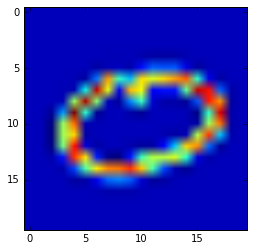

In [29]:
sample1 = data['X'][30]
print 'The label is ' + str(data['y'][30][0])
plt.imshow(sample1.reshape(20,20).T);

We can see above that the digit is a zero and the corresponding label is 10 as expected. We have to reshape the 400X1 array into a 20X20 array to match the original image before we using matplotlib to display it.

The label is 1


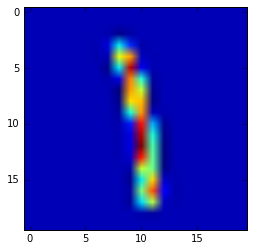

In [31]:
sample2 = data['X'][700]
print 'The label is ' + str(data['y'][700][0])
plt.imshow(np.reshape(sample2, (20,20)).T);

Again the label and te data from the features correspond, each being one. 

We are now ready to train a model to determine the digit based off the features we give it. We shall first try to use logistic regression as our classify. WE shall use "one vs al" logistic regression which enables us to do multi-variate classification.

First we shall split our data into training and test data to enable us ably and cofidently test our model.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data['X'], data['y'].ravel(), test_size=0.2,random_state=0)
lr = LogisticRegressionCV(Cs=20)
lr.fit(X_train, y_train)

LogisticRegressionCV(Cs=20, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

After training our classifier we can now classify our dataand see how well our model performs.

In [36]:
lr.score(X_test, y_test)

0.90100000000000002

Not bad. Our model as an accuracy of 90.1%. We can get a sample from the test data and see how it predicts it.

The prediction is 10, expected 10


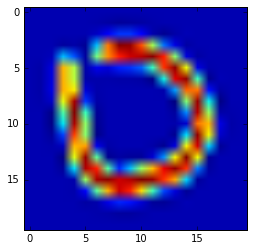

In [63]:
sample3 = X_test[0]
print 'The prediction is ' + str(lr.predict(sample3.reshape(1,-1))[0]) + ', expected ' + str(y_test[0])
plt.imshow(sample3.reshape(20,20).T);

We can see that the prediction of 10 (which is used in place of 0) is correct according to the label. We can also verify the same when we recreate the image with the features.

Our accuracy using logistic regression is good however we could probably do better with a neural network. Let us try using a neural network as our classifier.

In [55]:
neural_net = MLPClassifier(hidden_layer_sizes=(400,))
neural_net.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(400,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

We have now trained our neural network classifier so we can see how well it does. Using the score functionas before.

In [58]:
neural_net.score(X_test, y_test)

0.94099999999999995

Our neural network does much better on our test data with an accuracy of 94.1%, an improvement of 4% from our logisitic regresssion classifier.

We could do the same with the neural network and look at a sample and see how our model predicts it.

The prediction is 1, expected 1


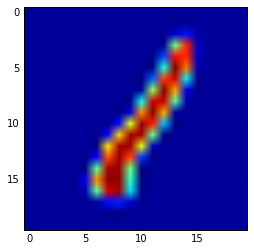

In [64]:
sample4 = X_test[100]
print 'The prediction is ' + str(lr.predict(sample4.reshape(1,-1))[0]) + ', expected ' + str(y_test[100])
plt.imshow(sample4.reshape(20,20).T);

As before we see that this is an accurate prediction and we can verify with the image as well.

We could probably do better on the accuracy through using more features or a more complex algorithm. In the case of the neural network we could attempt to use more hidden layers in pursuit of the higher accuracy.

In [66]:
neural_net2 = MLPClassifier(hidden_layer_sizes=(400, 200))
neural_net2.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(400, 200), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [67]:
neural_net2.score(X_test, y_test)

0.94599999999999995

As expected, the accuracy is a little better. More feature engineering and tweaking of the parameters could help push the accuracy even higher